# Etude tp des vols d'avions

In [5]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import os 

In [9]:
file_path = 'train.CSV'

df = pd.read_csv(file_path)




In [47]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [33]:
age_means = df.groupby('Customer Type')['Age'].mean()
for customer_type, age_mean in age_means.items():
    print(f"L'âge moyen des {customer_type}s est de : {age_mean:.2f} ans")


L'âge moyen des Loyal Customers est de : 41.39 ans
L'âge moyen des disloyal Customers est de : 30.37 ans


In [38]:
satisfaction = df.groupby(['Class', 'satisfaction']).size()

for (flight_class, satisfaction), count in satisfaction.items():
    print(f"{flight_class} - {satisfaction}: {count}")


Business - neutral or dissatisfied: 15185
Business - satisfied: 34480
Eco - neutral or dissatisfied: 38044
Eco - satisfied: 8701
Eco Plus - neutral or dissatisfied: 5650
Eco Plus - satisfied: 1844


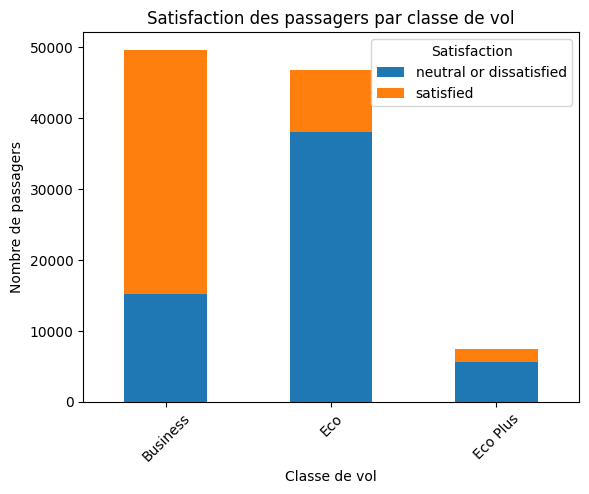

In [43]:
import matplotlib.pyplot as plt


satisfaction_per_class = df.groupby(['Class', 'satisfaction']).size().unstack()


satisfaction_per_class.plot(kind='bar', stacked=True)
plt.title('Satisfaction des passagers par classe de vol')
plt.xlabel('Classe de vol')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')


plt.show()


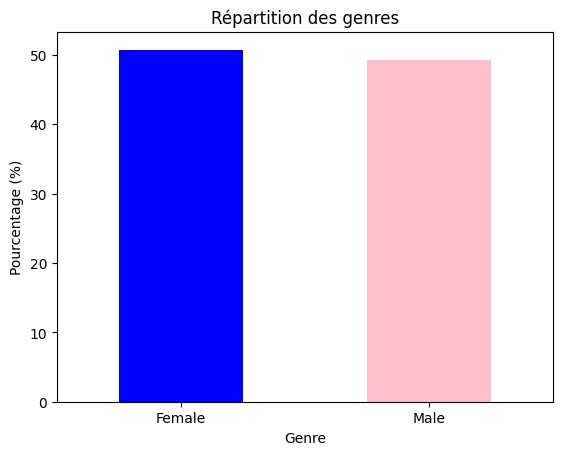

In [46]:

genre = df['Gender'].value_counts(normalize=True) * 100

genre.plot(kind='bar', color=['blue', 'pink'])

plt.title('Répartition des genres')
plt.xlabel('Genre')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=0)

plt.show()


In [55]:
average_food = df.groupby('Class')['Food and drink'].mean()
average_entertainment = df.groupby('Class')['Inflight entertainment'].mean()
average_seat_comfort = df.groupby('Class')['Seat comfort'].mean()
average_cleanliness = df.groupby('Class')['Cleanliness'].mean()


best_food_class = average_food.idxmax()
best_entertainment_class = average_entertainment.idxmax()
best_seat_comfort_class = average_seat_comfort.idxmax()
best_cleanliness_class = average_cleanliness.idxmax()

print(f"La classe avec la meilleure nourriture est : {best_food_class} (Note moyenne : {average_food[best_food_class]:.2f})")
print(f"La classe avec le meilleur divertissement est : {best_entertainment_class} (Note moyenne : {average_entertainment[best_entertainment_class]:.2f})")
print(f"La classe avec le meilleur confort des sièges est : {best_seat_comfort_class} (Note moyenne : {average_seat_comfort[best_seat_comfort_class]:.2f})")
print(f"La classe avec la meilleure propreté est : {best_cleanliness_class} (Note moyenne : {average_cleanliness[best_cleanliness_class]:.2f})")


La classe avec la meilleure nourriture est : Business (Note moyenne : 3.32)
La classe avec le meilleur divertissement est : Business (Note moyenne : 3.64)
La classe avec le meilleur confort des sièges est : Business (Note moyenne : 3.76)
La classe avec la meilleure propreté est : Business (Note moyenne : 3.48)
